### Notes on implementation
* S is initialized in each episode but Q is only initialized at the beginning so that the agent can accumulate knowledge over time. 
* Epsilon Greedy is handled by 

```python
    def choose_action(self, state):
        x = (np.random.uniform(0, 1))
        if  x < self.explore_rate:
            return self.env.action_space.sample()
        else:
            return np.argmax(self.Q_table[state])
        
```

* The explore_rate (ε) is determined dynamically using the get_explore_rate function, which decreases ε over time based on the episode number. 

```python 
    def get_explore_rate(self, t):
        return max(self.min_explore, min(1., 1. - math.log10((t + 1) / self.decay)))
```



In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

from MountainCarAgent import MountainCarAgent

def moving_average(arr, window_size=10):
    ret = np.cumsum(arr, dtype=float)
    ret[window_size:] = ret[window_size:] - ret[:-window_size]
    return ret[window_size - 1:] / window_size

### N-Step SARSA

In [2]:
agent_n_step_sarsa = MountainCarAgent(num_episodes = 500)

losses_n_step_sarsa = agent_n_step_sarsa.train(method='n-step-sarsa', n=10)

agent_n_step_sarsa.run()

Finished training!


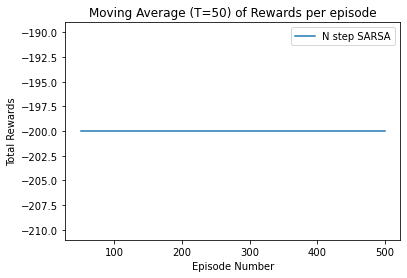

In [3]:
ma_losses_n_step_sarsa = moving_average(losses_n_step_sarsa, window_size=50)
x= np.arange(0,len(ma_losses_n_step_sarsa))

x = [x+50 for x in x]
plt.plot(x, ma_losses_n_step_sarsa, label='N step SARSA')

plt.title("Moving Average (T=50) of Rewards per episode")
plt.xlabel("Episode Number")
plt.ylabel("Total Rewards")
plt.legend()

log_df = pd.DataFrame({'rewards':ma_losses_n_step_sarsa})
log_df['method'] = 'N step SARSA'
log_df.to_csv("MountainCar_n_step_sarsa.csv")

### Monte Carlo

In [2]:
agent_mc = MountainCarAgent()
losses_mc = agent_mc.train(method='mc')
agent_mc.run()

At episode: 93, Win!!!
At episode: 101, Win!!!
At episode: 102, Win!!!
At episode: 103, Win!!!
At episode: 104, Win!!!
At episode: 109, Win!!!
At episode: 115, Win!!!
At episode: 116, Win!!!
At episode: 117, Win!!!
At episode: 119, Win!!!
At episode: 120, Win!!!
At episode: 121, Win!!!
At episode: 122, Win!!!
At episode: 124, Win!!!
At episode: 125, Win!!!
At episode: 126, Win!!!
At episode: 127, Win!!!
At episode: 128, Win!!!
At episode: 129, Win!!!
At episode: 130, Win!!!
At episode: 131, Win!!!
At episode: 132, Win!!!
At episode: 133, Win!!!
At episode: 134, Win!!!
At episode: 136, Win!!!
At episode: 137, Win!!!
At episode: 138, Win!!!
At episode: 139, Win!!!
At episode: 140, Win!!!
At episode: 187, Win!!!
At episode: 195, Win!!!
At episode: 196, Win!!!
At episode: 197, Win!!!
At episode: 198, Win!!!
At episode: 199, Win!!!
At episode: 200, Win!!!
At episode: 201, Win!!!
At episode: 202, Win!!!
At episode: 203, Win!!!
At episode: 204, Win!!!
At episode: 205, Win!!!
At episode: 206, 

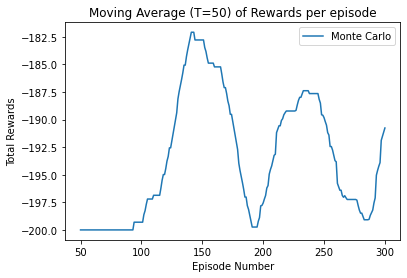

In [3]:
ma_losses_mc = moving_average(losses_mc, window_size=50)
x= np.arange(0,len(ma_losses_mc))

x = [x+50 for x in x]
plt.plot(x, ma_losses_mc, label='Monte Carlo')

plt.title("Moving Average (T=50) of Rewards per episode")
plt.xlabel("Episode Number")
plt.ylabel("Total Rewards")
plt.legend()


log_df = pd.DataFrame({'rewards':ma_losses_mc})
log_df['method'] = 'Monte Carlo'
log_df.to_csv("MountainCar_MC.csv")

### On Policy SARSA

<img src="on-policy-sarsa.png" width="500"/>


```python
 def train(self, method='mc'):
        losses=[]
        for i, e in enumerate(range(self.num_episodes)):
            i+=1
#             print("Start")/
            total_R=0
            current_state = self.discretize_state(self.env.reset(options={(-0.6,-0.4), 0})[0])
            self.lr = self.get_lr(e)
            self.explore_rate = self.get_explore_rate(e)
            termintated, truncated, position, end = False,False,False,False
            old_action = 1
            steps=0
            while not any([termintated, truncated, position, end]):
                steps+=1
                end = steps==200
                action = self.choose_action(current_state)
                obs, reward, termintated, truncated, _ = self.env.step(action)
                position = obs[0]>=0.5
                new_state = self.discretize_state(obs)
                
                total_R+=reward

                if method == 'mc':
                    self.mc_update(current_state, new_state, total_R, old_action, action,i)
                if method == 'sarsa':
                    self.sarsa_update(current_state, new_state, total_R, old_action, action,i)
                if method == 'ql':
                    self.ql_update(current_state, new_state, total_R, old_action, action,i)
                    
                if method == 'expected_sarsa':
                    self.expected_sarsa_update(current_state, new_state, total_R, old_action, action, i)
                
                if method == 'off_policy_expected_sarsa':
                    self.off_policy_expected_sarsa_update(current_state, new_state, total_R, old_action, i)
                    
                current_state = new_state
                old_action = action
            losses.append(total_R)
            if position == True:
                print('At episode: ', e, ', Win!!!', sep='')
#             self.mc_update(current_state, new_state, total_R, old_action, action,i)

        print('Finished training!')
        return losses
```


```python
    def sarsa_update(self, current_state, new_state, reward, old_action, action,i):
        q = self.Q_table[current_state][old_action]
        q += self.lr*(reward+self.discount*self.Q_table[new_state][action] - q)
        self.Q_table[current_state][old_action] = q
```

In [2]:
agent_on_policy_sarsa = MountainCarAgent()
losses_on_policy_sarsa = agent_on_policy_sarsa.train(method='sarsa')

agent_on_policy_sarsa.run()

At episode: 186, Win!!!
At episode: 206, Win!!!
At episode: 207, Win!!!
At episode: 208, Win!!!
At episode: 209, Win!!!
At episode: 210, Win!!!
At episode: 211, Win!!!
At episode: 213, Win!!!
At episode: 226, Win!!!
At episode: 227, Win!!!
At episode: 233, Win!!!
At episode: 235, Win!!!
At episode: 236, Win!!!
At episode: 242, Win!!!
At episode: 247, Win!!!
At episode: 293, Win!!!
At episode: 294, Win!!!
At episode: 295, Win!!!
At episode: 297, Win!!!
At episode: 298, Win!!!
At episode: 299, Win!!!
Finished training!
Win!!!


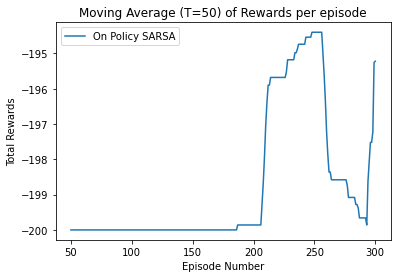

In [3]:
ma_losses_on_policy_sarsa = moving_average(losses_on_policy_sarsa, window_size=50)
x= np.arange(0,len(ma_losses_on_policy_sarsa))
x = [x+50 for x in x]
plt.plot(x, ma_losses_on_policy_sarsa, label='On Policy SARSA')

plt.title("Moving Average (T=50) of Rewards per episode")
plt.xlabel("Episode Number")
plt.ylabel("Total Rewards")
plt.legend()


log_df = pd.DataFrame({'rewards':ma_losses_on_policy_sarsa})
log_df['method'] = 'On Policy SARSA'
log_df.to_csv("MountainCar_on_policy_sarsa.csv")

### On Policy Expected SARSA

In [2]:
# logs['combination'] = reduce_join(logs, ['Epsilon', 'Num States','NUM_ACTIONS', 'MAX_ITERATIONS', 'GAMMA', 'ALPHA'])
# 0.05(10, 10)35000.950.2

In [3]:
agent_on_policy_expected_sarsa = MountainCarAgent()

losses_on_policy_expected_sarsa= agent_on_policy_expected_sarsa.train(method='expected_sarsa')
agent_on_policy_expected_sarsa.run()

At episode: 149, Win!!!
At episode: 214, Win!!!
At episode: 274, Win!!!
At episode: 283, Win!!!
At episode: 284, Win!!!
At episode: 293, Win!!!
At episode: 294, Win!!!
At episode: 295, Win!!!
At episode: 296, Win!!!
At episode: 297, Win!!!
At episode: 298, Win!!!
At episode: 299, Win!!!
Finished training!
Win!!!


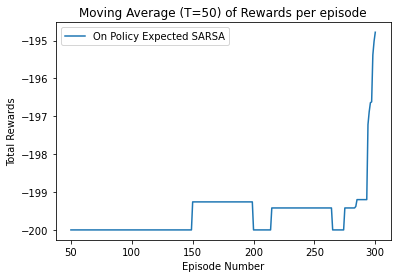

In [4]:
ma_losses_on_policy_expected_sarsa = moving_average(losses_on_policy_expected_sarsa, window_size=50)
x= np.arange(0,len(ma_losses_on_policy_expected_sarsa))

x = [x+50 for x in x]
plt.plot(x, ma_losses_on_policy_expected_sarsa, label='On Policy Expected SARSA')

plt.title("Moving Average (T=50) of Rewards per episode")
plt.xlabel("Episode Number")
plt.ylabel("Total Rewards")
plt.legend()

log_df = pd.DataFrame({'rewards':ma_losses_on_policy_expected_sarsa})
log_df['method'] = 'On Policy Expected SARSA'
log_df.to_csv("MountainCar_on_policy_expected_sarsa.csv")

### Off-policy expected SARSA with a greedy control policy.

In [2]:
# agent_off_policy_expected_sarsa_greedy = MountainCarAgent(buckets=(4, 2), num_episodes=3000, min_lr=0.01, min_explore=0.1, discount=0.9, decay=1)
agent_off_policy_expected_sarsa_greedy = MountainCarAgent(num_episodes = 500)

losses_off_policy_expected_sarsa_greedy= agent_off_policy_expected_sarsa_greedy.train(method='off_policy_expected_sarsa')
agent_off_policy_expected_sarsa_greedy.run()

At episode: 157, Win!!!
At episode: 170, Win!!!
At episode: 175, Win!!!
At episode: 192, Win!!!
At episode: 213, Win!!!
At episode: 219, Win!!!
At episode: 220, Win!!!
At episode: 221, Win!!!
At episode: 222, Win!!!
At episode: 223, Win!!!
At episode: 224, Win!!!
At episode: 225, Win!!!
At episode: 226, Win!!!
At episode: 228, Win!!!
At episode: 229, Win!!!
At episode: 241, Win!!!
At episode: 311, Win!!!
At episode: 317, Win!!!
At episode: 331, Win!!!
At episode: 334, Win!!!
At episode: 336, Win!!!
At episode: 338, Win!!!
At episode: 339, Win!!!
At episode: 368, Win!!!
At episode: 373, Win!!!
At episode: 375, Win!!!
At episode: 381, Win!!!
At episode: 385, Win!!!
At episode: 386, Win!!!
At episode: 387, Win!!!
At episode: 388, Win!!!
At episode: 389, Win!!!
At episode: 390, Win!!!
At episode: 391, Win!!!
At episode: 392, Win!!!
At episode: 393, Win!!!
At episode: 394, Win!!!
At episode: 396, Win!!!
At episode: 397, Win!!!
At episode: 398, Win!!!
At episode: 399, Win!!!
At episode: 400,

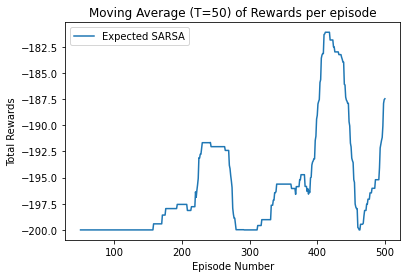

In [3]:
ma_losses_off_policy_expected_sarsa_greedy = moving_average(losses_off_policy_expected_sarsa_greedy, window_size=50)
x= np.arange(0,len(ma_losses_off_policy_expected_sarsa_greedy))

x = [x+50 for x in x]
plt.plot(x, ma_losses_off_policy_expected_sarsa_greedy, label='Expected SARSA')

plt.title("Moving Average (T=50) of Rewards per episode")
plt.xlabel("Episode Number")
plt.ylabel("Total Rewards")
plt.legend()

log_df = pd.DataFrame({'rewards':ma_losses_off_policy_expected_sarsa_greedy})
log_df['method'] = 'Off-policy expected SARSA with a greedy control policy'
log_df.to_csv("MountainCar_off_policy_expected_sarsa_greedy.csv")

### n-step SARSA

In [4]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

from MountainCarAgent import MountainCarAgent

def moving_average(arr, window_size=10):
    ret = np.cumsum(arr, dtype=float)
    ret[window_size:] = ret[window_size:] - ret[:-window_size]
    return ret[window_size - 1:] / window_size

agent_n_step_sarsa = MountainCarAgent(num_episodes = 300)

losses_n_step_sarsa= agent_n_step_sarsa.train(method='n_step_sarsa')
agent_n_step_sarsa.run()

Finished training!


### Method Comparison

In [5]:
import os
method_comparison = [x for x in os.listdir() if 'MountainCar' in x and '.csv' in x]
method_comparison

['MountainCar_MC.csv',
 'MountainCar_on_policy_sarsa.csv',
 'MountainCar_on_policy_expected_sarsa.csv',
 'MountainCar_off_policy_expected_sarsa_greedy.csv']

Text(0, 0.5, 'Total Rewards')

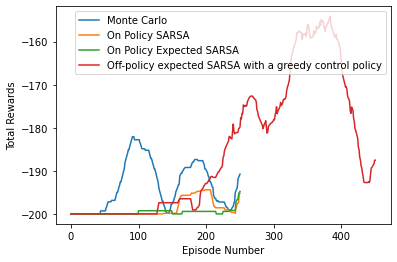

In [6]:

for i in range(0,len(method_comparison)): 
    temp_df = pd.read_csv(method_comparison[i])
    plt.plot(temp_df.index, temp_df['rewards'], label = f"{temp_df['method'].iloc[i]}")
plt.legend()
plt.xlabel("Episode Number")
plt.ylabel("Total Rewards")